In [34]:
#Install and import libraries
!pip install pmdarima
!pip install plotly
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
import warnings

distutils: c:\users\dr srinivas\anaconda39\Include\UNKNOWN
sysconfig: c:\users\dr srinivas\anaconda39\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\dr srinivas\anaconda39\Include\UNKNOWN
sysconfig: c:\users\dr srinivas\anaconda39\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\dr srinivas\anaconda39\python.exe -m pip install --upgrade pip' command.


distutils: c:\users\dr srinivas\anaconda39\Include\UNKNOWN
sysconfig: c:\users\dr srinivas\anaconda39\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\dr srinivas\anaconda39\Include\UNKNOWN
sysconfig: c:\users\dr srinivas\anaconda39\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\dr srinivas\anaconda39\python.exe -m pip install --upgrade pip' command.


In [35]:
# Load the excel file
data = pd.read_csv('hotel_bookings.csv')

# Get the number of rows and columns
rows = len(data.axes[0])
cols = len(data.axes[1])
  
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

#Show the first 5 rows
data.head()

Number of Rows: 119390
Number of Columns: 32


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [36]:
#Check if any value is Nan (not a number)
NaN = data.isna().sum()
NaN

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [38]:
#Drop columns agent and company as they have NaN values
data = data.drop(['company', 'agent'], axis=1)

#Drop the rows having NaN values in the columns country and childer
data = data.dropna(subset=['country', 'children'], axis=0)
data = data.reset_index(drop=True)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [39]:
#Change the data type for column children from float64 to int
data['children'] = data['children'].astype(int)
data['children'].dtype 

dtype('int32')

In [40]:
# Checking for the missing values after drops
NaN_updated = data.isna().sum()
NaN_updated

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [41]:
# Converting string month to numerical one (Dec = 12, Jan = 1, etc.)
datetime_object = data['arrival_date_month'].str[0:3]
month_number = np.zeros(len(datetime_object))

# Creating a new column based on numerical representation of the months
for i in range(0, len(datetime_object)):
    datetime_object[i] = datetime.datetime.strptime(datetime_object[i], "%b")
    month_number[i] = datetime_object[i].month

# Float to integer conversion
month_number = pd.DataFrame(month_number).astype(int)

In [42]:
# 3 columns are merged into one
data['arrival_date'] = data['arrival_date_year'].map(str) + '-' + month_number[0].map(str) + '-' \
                       + data['arrival_date_day_of_month'].map(str)

In [43]:
# Dropping already used columns
data = data.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
                  'arrival_date_week_number'], axis=1)
data.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-7-1
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-7-1
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-7-1
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-7-1
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-7-1


In [44]:
# Converting wrong datatype columns to correct type (object to datetime)
data['arrival_date'] = pd.to_datetime(data['arrival_date'])
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

print('Datatype of the arrival_date:', data['arrival_date'].dtype)
print('Datatype of the reservation_status_date:', data['reservation_status_date'].dtype)

Datatype of the arrival_date: datetime64[ns]
Datatype of the reservation_status_date: datetime64[ns]


In [45]:
# Calculating total guests for each record
data['Total Guests'] = data['adults'] + data['children'] + data['babies']

# Total Number of Days Stayed
data['Total Stays'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

#filter out data that has not been cancelled
dataNoCancel = data[data['is_canceled'] == 0]
dataNoCancel = dataNoCancel.reset_index(drop=True)

In [46]:
data.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,Total Guests,Total Stays
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2,0
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2,0
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


In [47]:
# Creating two dataframes for two different hotels
ResortHotel = data[data['hotel'] == 'Resort Hotel']
CityHotel = data[data['hotel'] == 'City Hotel']

data = data.reset_index(drop=True)

In [48]:
ResortHotel

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,Total Guests,Total Stays
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2,0
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2,0
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39591,Resort Hotel,0,212,2,8,2,1,0,BB,GBR,...,0,Transient,89.75,0,0,Check-Out,2017-09-10,2017-08-31,3,10
39592,Resort Hotel,0,169,2,9,2,0,0,BB,IRL,...,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,2017-08-30,2,11
39593,Resort Hotel,0,204,4,10,2,0,0,BB,IRL,...,0,Transient,153.57,0,3,Check-Out,2017-09-12,2017-08-29,2,14
39594,Resort Hotel,0,211,4,10,2,0,0,HB,GBR,...,0,Contract,112.80,0,1,Check-Out,2017-09-14,2017-08-31,2,14


In [49]:
#Get subset of date and total number of guests
TotalGuest_Resort = ResortHotel[['arrival_date', 'Total Guests']]
#Get the total number of guests based on date
DailyGuest_Resort = ResortHotel['Total Guests'].groupby(ResortHotel['arrival_date']).sum()
# Calculating Number of Guests arriving weekly
WeeklyGuest_Resort = DailyGuest_Resort.resample('w').sum().to_frame()
WeeklyGuest_Resort 

,Total Guests
arrival_date,
2015-07-05,466
2015-07-12,607
2015-07-19,728
2015-07-26,703
2015-08-02,775
...,...
2017-08-06,1061
2017-08-13,882
2017-08-20,1058


In [50]:
#Get subset of date and total number of guests
TotalGuest_City = CityHotel[['arrival_date', 'Total Guests']]
#Get the total number of guests based on date
DailyGuest_City = CityHotel['Total Guests'].groupby(CityHotel['arrival_date']).sum()
# Calculating Number of Guests arriving weekly
WeeklyGuest_City = DailyGuest_City.resample('w').sum().to_frame()
WeeklyGuest_City 

,Total Guests
arrival_date,
2015-07-05,354
2015-07-12,441
2015-07-19,646
2015-07-26,876
2015-08-02,446
...,...
2017-08-06,1584
2017-08-13,1623
2017-08-20,1802


In [51]:
dataResortMonthly = ResortHotel['arrival_date'].value_counts()
dataResortMonthly = dataResortMonthly.resample('m').sum().to_frame()

dataCityMonthly = CityHotel['arrival_date'].value_counts()
dataCityMonthly = dataCityMonthly.resample('m').sum().to_frame()

fig = go.Figure()
fig.add_trace(go.Scatter(x=dataResortMonthly.index, y=dataResortMonthly['arrival_date'], name="Resort Hotel",
                         hovertext=dataResortMonthly['arrival_date']))
fig.add_trace(go.Scatter(x=dataCityMonthly.index, y=dataCityMonthly['arrival_date'], name="City Hotel",
                         hovertext=dataCityMonthly['arrival_date']))
fig.update_layout(title_text='Number of Records Monthly',
                  title_x=0.5, title_font=dict(size=30))  
fig.update_layout(
    xaxis_title="Arrival Date",
    yaxis_title="Number of Records")

fig.show()

In [52]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=WeeklyGuest_Resort.index, y=WeeklyGuest_Resort['Total Guests'],
                         name="Resort Hotel",
                         hovertext=WeeklyGuest_Resort['Total Guests']))
fig.add_trace(go.Scatter(x=WeeklyGuest_City.index, y=WeeklyGuest_City['Total Guests'],
                         name="City Hotel",
                         hovertext=WeeklyGuest_City['Total Guests']))
fig.update_layout(title_text='Number of Guests Weekly',
                  title_x=0.5, title_font=dict(size=30))  
fig.update_layout(
    xaxis_title="Arrival Date",
    yaxis_title="Number of Guests")

fig.show()

### ARIMA Model for Predicting Future Number of Guests (CITY HOTEL)

In [53]:
trainCity = WeeklyGuest_City[:90]
testCity = WeeklyGuest_City[90:]

In [55]:
# Fit auto_arima function to NumberOfGuests_CityWeekly Dataset
stepwise_fit = auto_arima(trainCity['Total Guests'], 
                          start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=False,
                          d=None, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1262.243, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1267.908, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1265.704, Time=0.02 sec


C:\Users\Dr Srinivas\anaconda39\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1261.197, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1266.100, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1260.684, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1261.729, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1259.495, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1261.117, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1257.926, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1259.142, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1259.525, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1260.188, Time=0.07 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0]          
Total fit time: 0.917 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:               SARIMAX(0, 1, 3)   Log Likelihood                -624.963
Date:                Wed, 27 Oct 2021   AIC                           1257.926
Time:                        21:48:20   BIC                           1267.880
Sample:                             0   HQIC                          1261.938
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3272      0.098     -3.326      0.001      -0.520      -0.134
ma.L2         -0.1760      0.103     -1.707      0.088      -0.378       0.026
ma.L3          0.2022      0.129      1.568      0.117      -0.051       0.455
sigma2      7.336e+04   1.08e+04      6.763      0.000    5.21e+04    9.46e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.90   Prob(JB):                         0.72
Heteroskedasticity (H):               0.65   Skew:                             0.18
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
modelCity = ARIMA(trainCity['Total Guests'],
                  order=(0,1,3))#,
                #  seasonal_order=(2, 1, 0, 12))

resultCity = modelCity.fit()

# Prediction of the Test data
predictionsCityTest = resultCity.predict(90, 113, typ='levels').rename("Predictions")

Text(0, 0.5, 'Number of Guests')

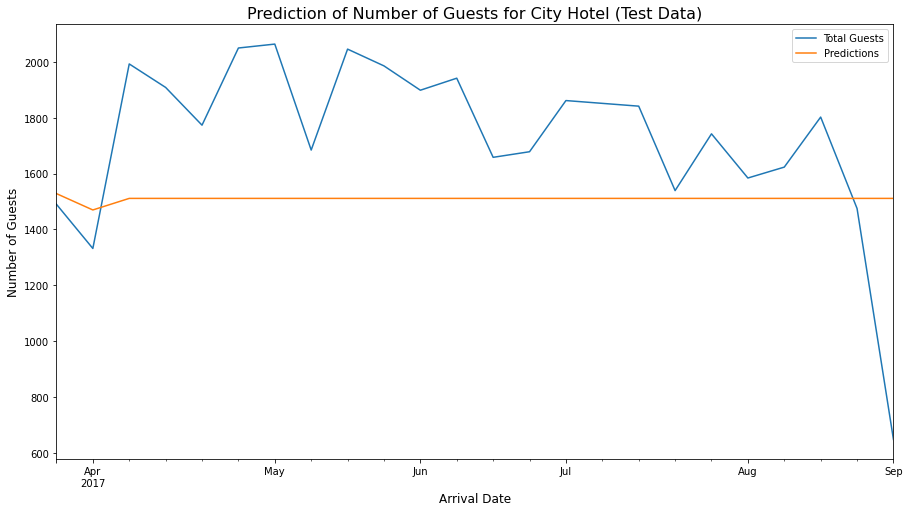

In [57]:
plt.figure(figsize=(15, 8))
testCity['Total Guests'].plot(legend=True)
predictionsCityTest.plot(legend=True)
plt.title('Prediction of Number of Guests for City Hotel (Test Data)', fontsize=16)
plt.xlabel('Arrival Date', fontsize=12)
plt.ylabel('Number of Guests', fontsize=12)

Text(0, 0.5, 'Number of Guests')

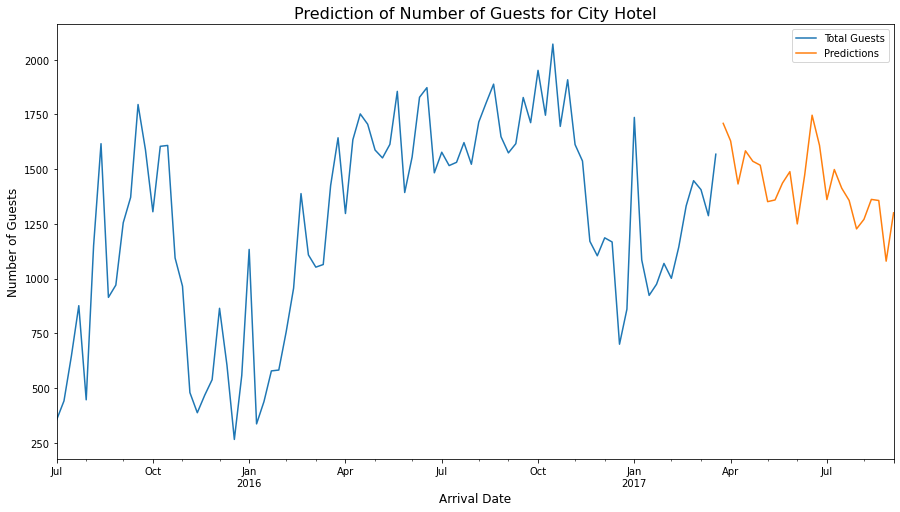

In [24]:
plt.figure(figsize=(15, 8))
trainCity['Total Guests'].plot(legend=True)
predictionsCityTest.plot(legend=True)
plt.title('Prediction of Number of Guests for City Hotel', fontsize=16)
plt.xlabel('Arrival Date', fontsize=12)
plt.ylabel('Number of Guests', fontsize=12)

In [25]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [26]:
mape(testCity, predictionsCityTest)

24.065383372303334

### ARIMA Model for Predicting Future Number of Guests RESORT HOTEL

In [27]:
trainResort = WeeklyGuest_Resort[:90]
testResort = WeeklyGuest_Resort[90:]

In [28]:
# Fit auto_arima function to NumberOfGuests_ResortWeekly Dataset
stepwise_fit = auto_arima(trainResort['Total Guests'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1089.472, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1056.740, Time=0.28 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1087.599, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1063.039, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1047.913, Time=0.92 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.83 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1074.977, Time=0.66 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1041.334, Time=1.35 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1049.274, Time=0.42 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=1042.8

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   90
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -514.757
Date:                            Wed, 27 Oct 2021   AIC                           1039.513
Time:                                    12:01:44   BIC                           1051.297
Sample:                                         0   HQIC                          1044.230
                                             - 90                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3882      0.114      3.418      0.001       0.166       0.611
ar.L2          0.3254      0.104      3.125      0.002       0.121       0.530
ar.S.L12      -0.4744      0.133     -3.560      0.000      -0.736      -0.213
ar.S.L24      -0.4154      0.132     -3.154      0.002      -0.674      -0.157
sigma2       2.96e+04   6748.532      4.386      0.000    1.64e+04    4.28e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 1.26
Prob(Q):                              0.69   Prob(JB):                         0.53
Heteroskedasticity (H):               0.75   Skew:                            -0.05
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
modelResort = ARIMA(trainResort['Total Guests'],
                    order=(2, 0, 0),
                    seasonal_order=(2, 1, 0, 12))

resultResort = modelResort.fit()

# Prediction of the Test data
predictionsResortTest = resultResort.predict(90, 113, typ='levels').rename("Predictions")

Text(0, 0.5, 'Number of Guests')

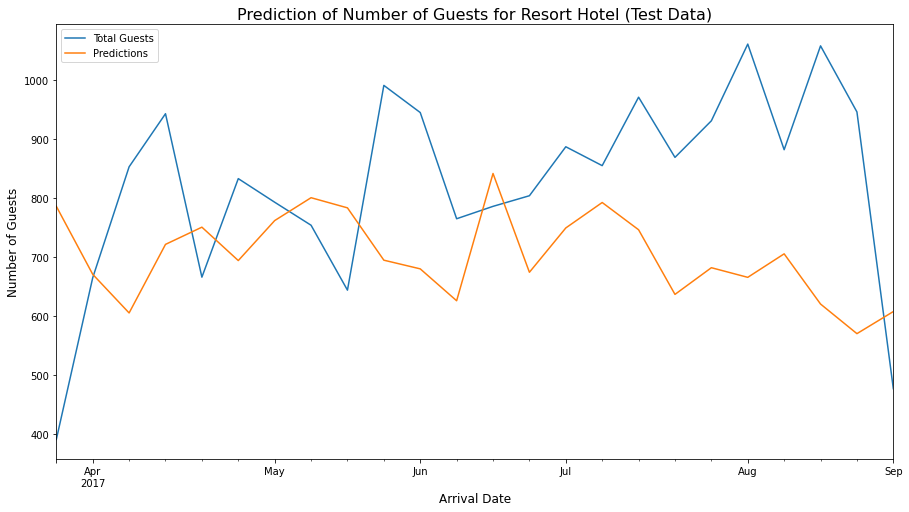

In [30]:
plt.figure(figsize=(15, 8))
testResort['Total Guests'].plot(legend=True)
predictionsResortTest.plot(legend=True)
plt.title('Prediction of Number of Guests for Resort Hotel (Test Data)', fontsize=16)
plt.xlabel('Arrival Date', fontsize=12)
plt.ylabel('Number of Guests', fontsize=12)

Text(0, 0.5, 'Number of Guests')

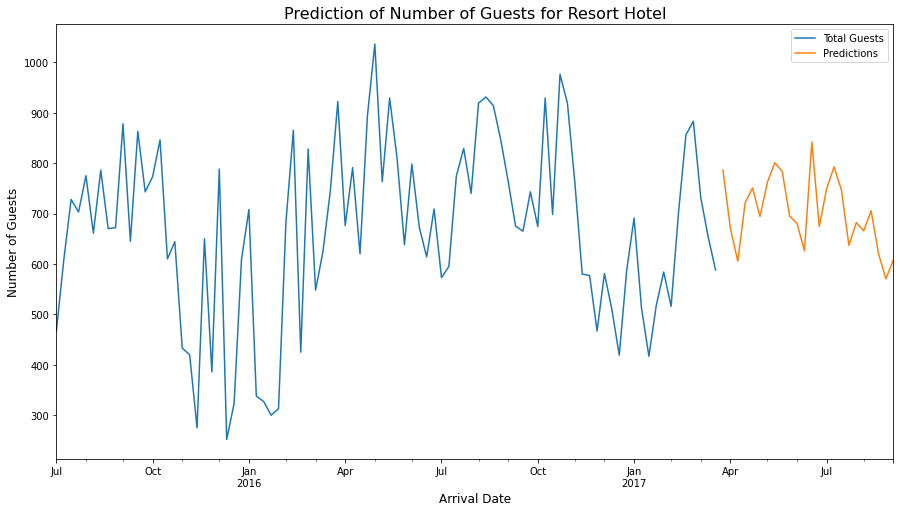

In [31]:
plt.figure(figsize=(15, 8))
trainResort['Total Guests'].plot(legend=True)
predictionsResortTest.plot(legend=True)
plt.title('Prediction of Number of Guests for Resort Hotel', fontsize=16)
plt.xlabel('Arrival Date', fontsize=12)
plt.ylabel('Number of Guests', fontsize=12)

In [32]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [33]:
mape(testResort,predictionsResortTest)

22.945222652734802